# BST plots

In [92]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
def P2dB(X): 
    return 10*np.log10(X+1e-3)

In [147]:
START_TIME="2022-12-12 15:10:00"
END_TIME=  "2022-12-13 11:00:00"
tstart=datetime.fromisoformat(START_TIME) 
filename="BST_%s.npy"%(START_TIME)
bst=BSTs('bst') #start 11-25 11:58
step_mins=5;
try:
    D=np.load(filename+"xxx")
except:
    
    tend  =datetime.fromisoformat(END_TIME)
    D=bst.getData_percentile(tstart,tend,60*step_mins,percentile=50) #5 min avg
    np.save(filename,D)
finally:
    print(D.shape)

Load BST bst/BST_2022-12-12-15-08-35.h5
Load BST bst/BST_2022-12-12-16-08-35.h5
Load BST bst/BST_2022-12-12-17-08-35.h5
Load BST bst/BST_2022-12-12-18-08-35.h5
Load BST bst/BST_2022-12-12-19-08-35.h5
Load BST bst/BST_2022-12-12-20-08-35.h5
Load BST bst/BST_2022-12-12-21-08-35.h5
Load BST bst/BST_2022-12-12-22-08-35.h5
Load BST bst/BST_2022-12-12-23-08-35.h5
Load BST bst/BST_2022-12-13-00-08-35.h5
Load BST bst/BST_2022-12-13-01-08-35.h5
Load BST bst/BST_2022-12-13-02-08-35.h5
Load BST bst/BST_2022-12-13-03-08-35.h5
Load BST bst/BST_2022-12-13-04-08-35.h5
Load BST bst/BST_2022-12-13-05-08-35.h5
Load BST bst/BST_2022-12-13-06-08-35.h5
Load BST bst/BST_2022-12-13-07-08-35.h5
Load BST bst/BST_2022-12-13-08-08-35.h5
Load BST bst/BST_2022-12-13-09-08-35.h5
Load BST bst/BST_2022-12-13-10-08-35.h5
(233, 2, 976)


In [148]:
Dtime=P2dB(np.percentile(D[:,0,:],50,axis=1))
hours=np.arange(D.shape[0])*step_mins/60
plt.plot(hours,Dtime[:])
plt.plot(hours,Dtime[:])
#plt.plot(hours,P2dB(np.mean(D[:,0,:],axis=1)))
#time_mask=Dtime<(np.min(Dtime)+0.5)
#time_mask=(hours>4.5)*(hours<17)
#plt.plot(hours,Dtime[:]/time_mask,'k')
#plt.plot(time_mask*np.min(Dtime))
#plt.ylim(70.5,72)
plt.xlabel("Time (hours)")
plt.ylabel("Power (dB)")
plt.grid()

In [149]:
R0=0.05
uv_step=0.08*R0
X=np.arange(-R0,R0,uv_step)
N=len(X)
#print(N,X)
I=np.ones([len(X)])
Y=np.outer(I,X)
X=np.outer(X,I)
R=np.sqrt(X*X+Y*Y)
mask=R<R0
theta=np.arccos(R*mask)#/np.pi*180
phi=np.angle(X+1j*Y)#/np.pi*180
x0=np.cos(theta)*np.sin(phi)
y0=np.cos(theta)*np.cos(phi)
z0=np.sin(theta)
star_dec=58+48./60+54./3600
star_ra=(23+23./60+24./3600)
ang1=(90-star_dec)/180*np.pi;
x1=x0;
y1= y0*np.cos(ang1)+z0*np.sin(ang1)
z1=-y0*np.sin(ang1)+z0*np.cos(ang1)
ang2=star_ra/24*360 #deg
ang2=ang2/180*np.pi; #rad
x2= x1*np.cos(ang2)+y1*np.sin(ang2)
y2=-x1*np.sin(ang2)+y1*np.cos(ang2)
z2=z1

theta2=np.arcsin(z2)
phi2=np.arctan(x2/y2)
print("Number of beams:",np.sum(mask))
if False:
    plt.subplot(2,2,1)
    plt.imshow(R/mask);plt.colorbar();plt.title('R');
    plt.subplot(2,2,2)
    plt.imshow(theta2/mask/np.pi*180);plt.colorbar();plt.title('theta');
    plt.subplot(2,2,3)
    plt.imshow(phi2/mask/np.pi*180,cmap='twilight');plt.colorbar();plt.title('phi');



Number of beams: 484


In [150]:
index=np.array(range(N*N))
indexC=np.compress(mask.flatten(),index)
NC=len(indexC)
thetaC=np.compress(mask.flatten(),theta2.flatten())
phiC=np.compress(mask.flatten(),phi2.flatten())
def makeMat(N,indexC,varC,zeros=None):
    D=np.zeros([N*N])
    D[:]=zeros
    D[indexC]=varC
    D=D.reshape([N,N])
    return D
#plt.imshow(makeMat(N,indexC,phiC))

['2022-12-12 15:10:00.000' '2022-12-12 15:15:00.000'
 '2022-12-12 15:20:00.000' '2022-12-12 15:25:00.000'
 '2022-12-12 15:30:00.000']
(233,)


(-1.0, 1.0)

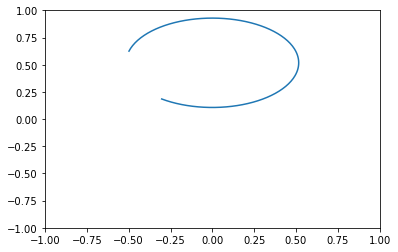

In [151]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.time import Time
import astropy.units as u
CasA = SkyCoord.from_name('Cas A')
CygA = SkyCoord.from_name('Cyg A')
#Sun = SkyCoord.from_name('Sun')
stars=[CasA]#,CygA]
ASTRON=EarthLocation(lat=52.811186*u.deg,lon=6.395318*u.deg,height=50*u.m);
time=Time(START_TIME) +hours*u.hour
print(time[:5])
from astropy.coordinates import AltAz
#el=[]
#altazs=[]
XY=[]
for star in stars:
    altaz = star.transform_to(AltAz(obstime=time,location=ASTRON))
    alt=altaz.alt.value/180*np.pi
    az=altaz.az.value/180*np.pi
    #altazs.append([altaz.alt.value,altaz.az.value])
    Y=np.cos(alt)*np.cos(az)
    X=np.cos(alt)*np.sin(az)
    print(Y.shape)
    XY.append([X,Y])
    #el.append(90-np.arcsin(Y)/np.pi*180)
#XY=np.array(XY);
#print(XY.shape)
for xy in XY:
    plt.plot(-xy[0],xy[1])
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.xlabel("elevation")

In [152]:
def plotpos(time_slot):
    ax = plt.gca()
    ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
    ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
    ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
    for xy in XY:
        plt.plot(-xy[0][time_slot],xy[1][time_slot],'kx')
    plt.axis("off")
plt.figure()
plotpos(0)

In [153]:
PAULUS = False

In [154]:


steps = 25
x_ax = np.arange(steps)/(steps-1)
y_ax = x_ax*(np.max(thetaC)-np.min(thetaC))+np.min(thetaC)
x_ax = x_ax*(np.max(phiC)-np.min(phiC))+np.min(phiC)
x_ax = x_ax/np.pi*12 #hours
y_ax = y_ax/np.pi*180 #degrees
def plot_map(data, bar=True, time_slot=0):
    plt.pcolor(x_ax, y_ax, makeMat(N,indexC,(data)))
    plt.xlabel('ra (hrs)')
    plt.ylabel('dec (deg) ')
    plottime=tstart+timedelta(hours=hours[time_slot])
    plt.title(f"{plottime.isoformat()}") 
    plt.plot([star_ra-24],[star_dec],'kx')
    if bar:
        plt.colorbar(label='Power dB')

In [155]:
hour_select=5
i=np.argmin(np.abs(hours-hour_select))
bstnormX=np.mean(D[i,0][:2*NC:2])
bstnormY=np.mean(D[i,0][1:2*NC:2])
print('norm=',P2dB(bstnormX),P2dB(bstnormY))

norm= 81.68950920078203 81.53796844574939


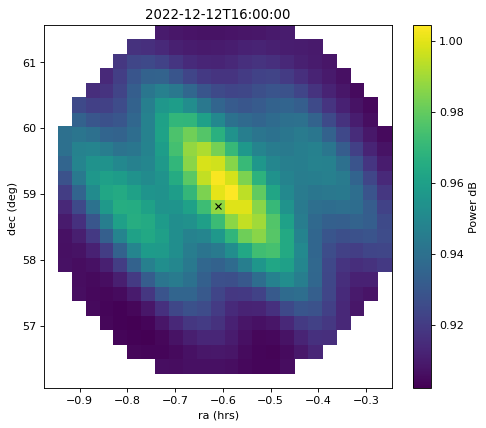

In [156]:
hour_select=8
i=np.argmin(np.abs(hours-hour_select))
bstX=D[i,0][:2*NC:2]/D[i,0][2*NC+2]
bstY=D[i,0][1:1+2*NC:2]/D[i,0][2*NC+3]
#bstX=D[i,0][:2*NC:2].copy()#/D[0,0][2*NC]
#bstnorm=np.mean(bstX)
#bstX/=bstnormX #/np.mean(D[x,0][2*NC]
#bstY=D[i,0][1:1+2*NC:2].copy()#/D[0,0][2*NC+1]
if PAULUS:
    plt.imshow(makeMat(N,indexC,(bstX)),extent=(np.min(phiC)/np.pi*12,np.max(phiC)/np.pi*12,np.min(thetaC)/np.pi*180,np.max(thetaC)/np.pi*180),aspect='auto')
    plt.colorbar(label='Power dB')
else:
    plt.figure(figsize=(7,6), dpi=80)
    plot_map(bstX,time_slot=10)
plt.show()

In [157]:
from time import sleep
from IPython.display import clear_output
fig_files = []
for x in range(D.shape[0]):
#    if not(time_mask[x]): continue;
    clear_output(wait=True)
    plt.figure(figsize=(12,4),dpi=100)
    bstX=D[x,0][:2*NC:2]/D[x,0][2*NC+2]
    bstY=D[x,0][1:1+2*NC:2]/D[x,0][2*NC+3]
    #bstX=D[x,0][:2*NC:2].copy()
    #bstX/=bstnormX;# np.percentile(bstX,50)
    #bstY=D[x,0][1:1+2*NC:2].copy()#/D[x,0][2*NC+1]    
    #bstY/=bstnormY; #np.percentile(bstY,50)
    fig1=plt.subplot(1,3,1)
    if PAULUS:
        plt1=plt.imshow(makeMat(N,indexC,P2dB(bstX)),vmin=-0.2,vmax=0.4)
    else:
        plot_map(bstX, bar=False, time_slot=x) 
        plt.colorbar()
        #fig1.set_aspect('equal')
#    for xy in XY[:1]:
#        plt.plot(xy[0][x],xy[1][x],'k.',markersize=5)
    fig2=plt.subplot(1,3,2)
    if PAULUS:
        plt2=plt.imshow(makeMat(N,indexC,P2dB(bstY)),vmin=-0.2,vmax=0.4)
    else:
        plot_map(bstY, bar=False, time_slot=x) 
        plt.colorbar(label='Power')
        #fig2.set_aspect('equal')
#    for xy in XY[:1]:
#        plt.plot(xy[0][x],xy[1][x],'k.',markersize=5)
    fig3=plt.subplot(1,3,3)
    plotpos(x)

#    plt.colorbar()
    file_name = 'map_' + str(x) + '.png'
    fig_files.append(file_name)
    plt.savefig(file_name)
    plt.show();
    sleep(0.2)

In [158]:
import imageio
with imageio.get_writer('beams_skymap_LBA.gif', mode='I') as writer:
    for filename in fig_files:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_327209/760917888.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [159]:
!rm map_*.png

In [ ]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484]),label='484-X')
plt.plot(P2dB(D[:,0,2*485]),label='485-X')
plt.plot(P2dB(D[:,0,2*486]),label='486-X')
#for x in range(488):
#    plt.plot(P2dB(D[:,0,2*x]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('Beam Stati')

(70.0, 72.0)

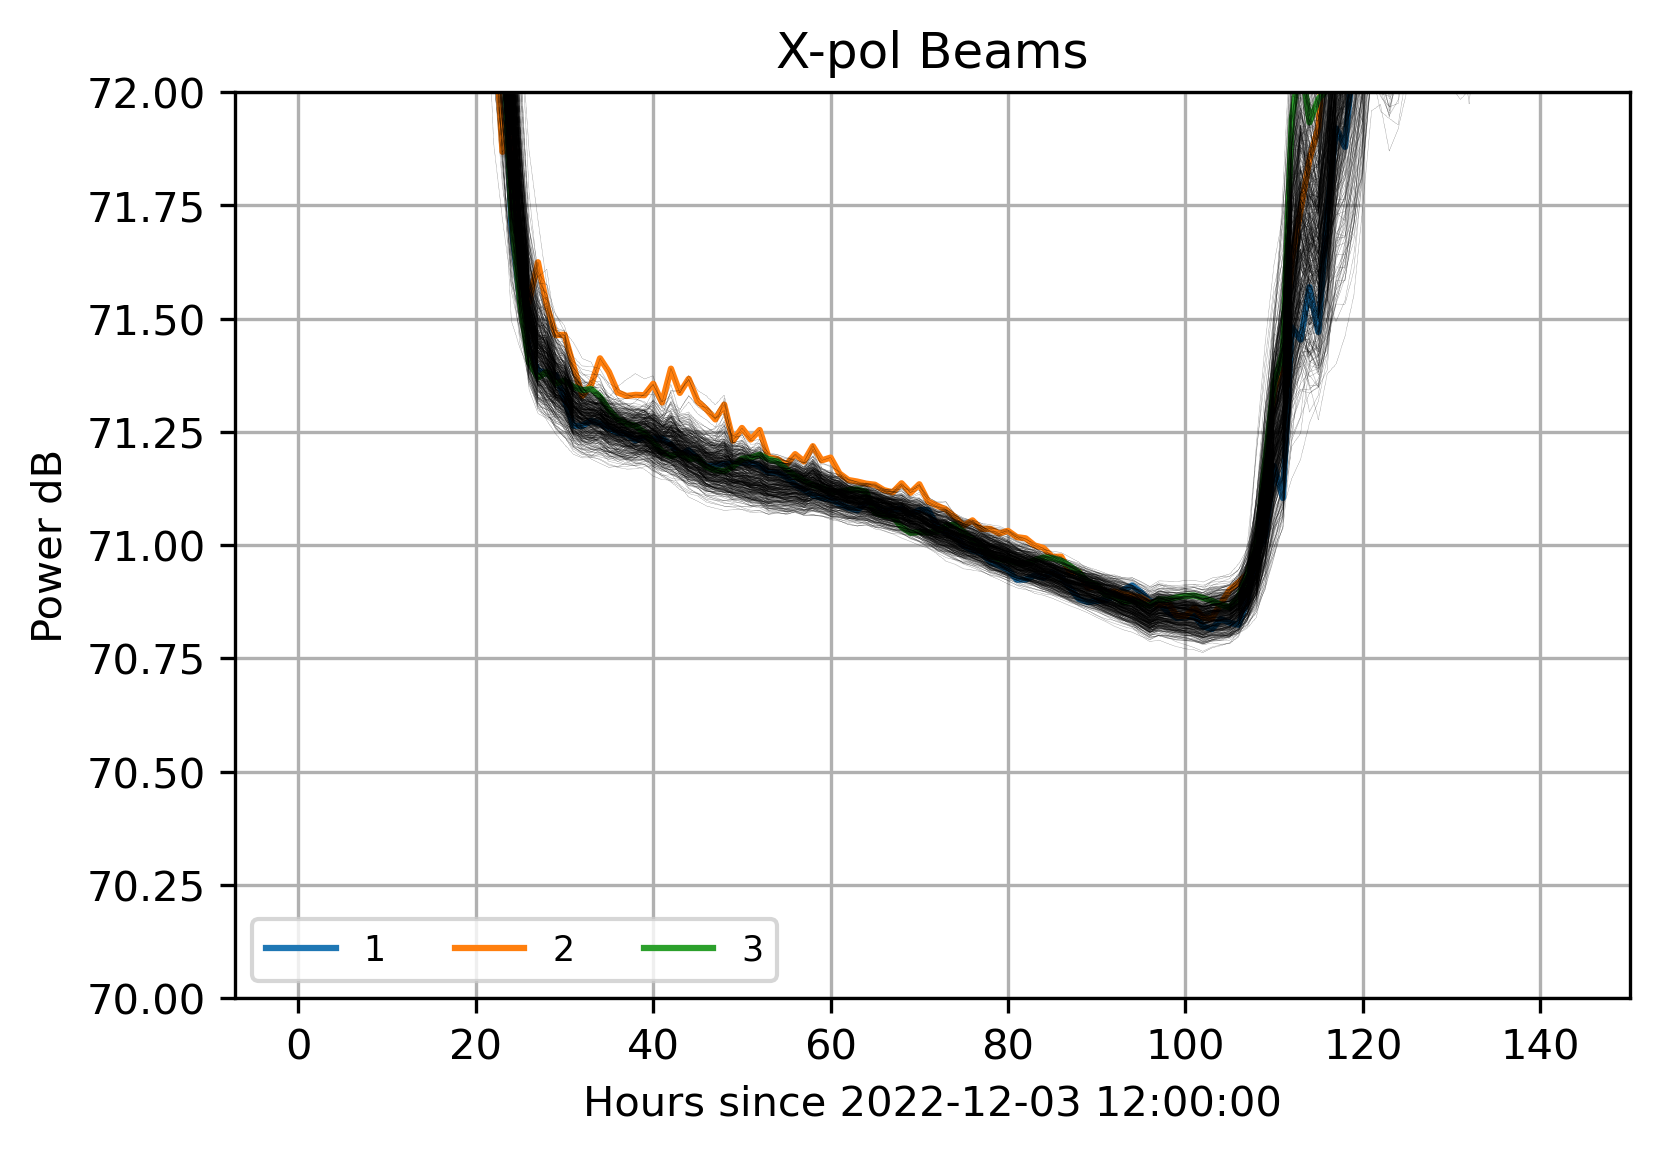

In [109]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484+1]),label='1')
plt.plot(P2dB(D[:,0,2*485+1]),label='2')
plt.plot(P2dB(D[:,0,2*486+1]),label='3')
for x in range(488):
    plt.plot(P2dB(D[:,0,2*x+1]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('X-pol Beams')
plt.ylim(70,72)

In [68]:
plt.pcolor?